# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from citipy import citipy
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
     if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | guiuan
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | mahalapye
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | kerikeri
Processing Record 11 of Set 1 | pacocha
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | seydi
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | peace river
Processi

Processing Record 39 of Set 4 | aasiaat
Processing Record 40 of Set 4 | lianyuan
Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | san patricio
Processing Record 43 of Set 4 | hanceville
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | ugoofaaru
Processing Record 46 of Set 4 | merta
Processing Record 47 of Set 4 | sao joao da barra
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | broken hill
Processing Record 0 of Set 5 | olean
Processing Record 1 of Set 5 | howrah
Processing Record 2 of Set 5 | paka
Processing Record 3 of Set 5 | vilyuysk
Processing Record 4 of Set 5 | castillos
Processing Record 5 of Set 5 | keflavik
Processing Record 6 of Set 5 | tromso
Processing Record 7 of Set 5 | howard springs
Processing Record 8 of Set 5 | tsiombe
Processing Record 9 of Set 5 | conceicao da barra
Processing Record 10 of Set 5 | anloga
Processing Record 11 of Set 5 | west island
Processing Record 12 of Set 5 | viligili
C

Processing Record 32 of Set 8 | tangalle
Processing Record 33 of Set 8 | horta
Processing Record 34 of Set 8 | chifeng
Processing Record 35 of Set 8 | olinda
Processing Record 36 of Set 8 | richfield
Processing Record 37 of Set 8 | fortaleza
Processing Record 38 of Set 8 | acu
Processing Record 39 of Set 8 | hadibu
Processing Record 40 of Set 8 | timbuktu
Processing Record 41 of Set 8 | port isabel
Processing Record 42 of Set 8 | raduzhny
Processing Record 43 of Set 8 | kapit
Processing Record 44 of Set 8 | ballina
Processing Record 45 of Set 8 | holualoa
Processing Record 46 of Set 8 | whangarei
Processing Record 47 of Set 8 | rurrenabaque
Processing Record 48 of Set 8 | samus'
Processing Record 49 of Set 8 | laguna
Processing Record 0 of Set 9 | guerrero negro
Processing Record 1 of Set 9 | coahuayana de hidalgo
Processing Record 2 of Set 9 | solnechnyy
Processing Record 3 of Set 9 | moanda
Processing Record 4 of Set 9 | tegueste
Processing Record 5 of Set 9 | wuyang
Processing Recor

City not found. Skipping...
Processing Record 24 of Set 12 | maridi
Processing Record 25 of Set 12 | karasuk
Processing Record 26 of Set 12 | changyon
Processing Record 27 of Set 12 | prince albert
Processing Record 28 of Set 12 | saksaul'skiy
City not found. Skipping...
Processing Record 29 of Set 12 | yaren
Processing Record 30 of Set 12 | saldanha
Processing Record 31 of Set 12 | mumford
Processing Record 32 of Set 12 | old town
Processing Record 33 of Set 12 | saint-joseph
Processing Record 34 of Set 12 | sarupathar
Processing Record 35 of Set 12 | little cayman
City not found. Skipping...
Processing Record 36 of Set 12 | mount pearl
Processing Record 37 of Set 12 | oliver
Processing Record 38 of Set 12 | chibougamau
Processing Record 39 of Set 12 | recani
-----------------------------
Data Retrieval Complete      
-----------------------------


In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
                        
# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [30]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,22.67,71,19,9.44,MU,1691513100
1,guiuan,11.0333,125.7247,29.17,76,84,5.38,PH,1691513100
2,bredasdorp,-34.5322,20.0403,10.95,83,55,2.11,ZA,1691513100
3,adamstown,-25.0660,-130.1015,22.27,87,98,12.56,PN,1691513100
4,avarua,-21.2078,-159.7750,18.03,88,20,1.54,CK,1691513100
5,uturoa,-16.7333,-151.4333,25.40,78,79,1.71,PF,1691513100
6,udachny,66.4167,112.4000,19.14,51,45,2.38,RU,1691513100
7,mahalapye,-23.1041,26.8142,18.45,19,0,3.13,BW,1691513100
8,iqaluit,63.7506,-68.5145,6.85,87,40,5.66,CA,1691513100
9,kerikeri,-35.2268,173.9474,6.09,92,42,2.15,NZ,1691513100


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,22.67,71,19,9.44,MU,1691513100
1,guiuan,11.0333,125.7247,29.17,76,84,5.38,PH,1691513100
2,bredasdorp,-34.5322,20.0403,10.95,83,55,2.11,ZA,1691513100
3,adamstown,-25.0660,-130.1015,22.27,87,98,12.56,PN,1691513100
4,avarua,-21.2078,-159.7750,18.03,88,20,1.54,CK,1691513100


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

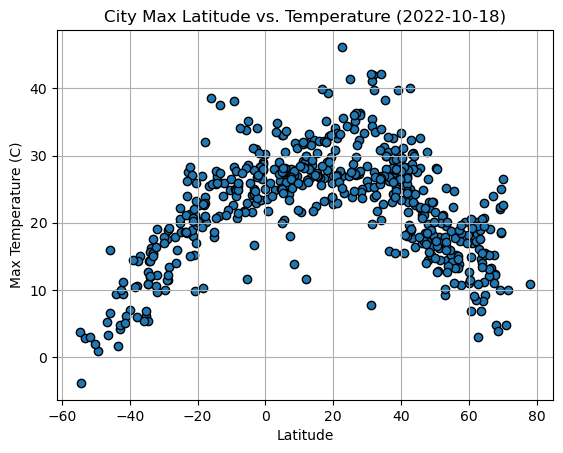

In [39]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

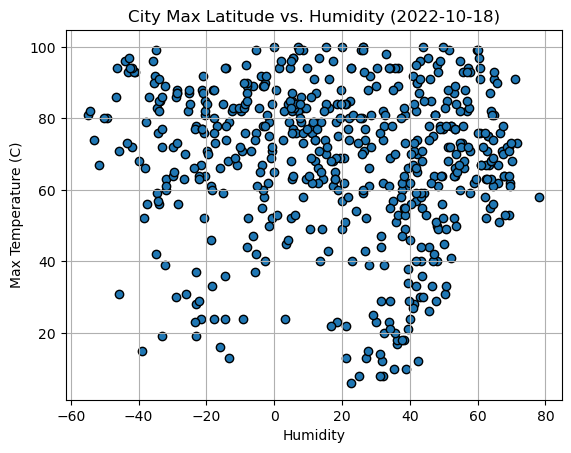

In [45]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

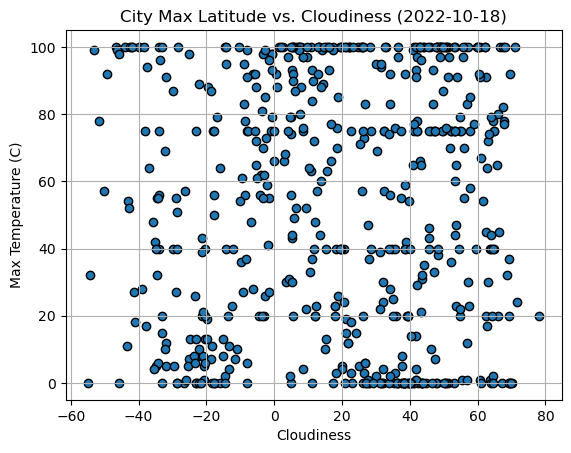

In [46]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

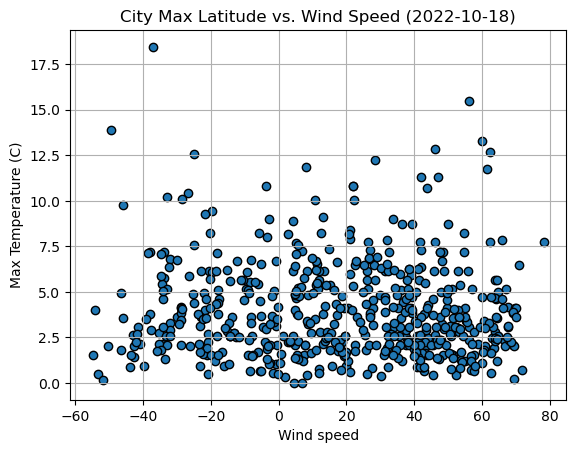

In [47]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Wind speed")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

In [48]:
print(json.dumps(city_data, indent=4, sort_keys=True))

[
    {
        "City": "port mathurin",
        "Cloudiness": 19,
        "Country": "MU",
        "Date": 1691513100,
        "Humidity": 71,
        "Lat": -19.6833,
        "Lng": 63.4167,
        "Max Temp": 22.67,
        "Wind Speed": 9.44
    },
    {
        "City": "guiuan",
        "Cloudiness": 84,
        "Country": "PH",
        "Date": 1691513100,
        "Humidity": 76,
        "Lat": 11.0333,
        "Lng": 125.7247,
        "Max Temp": 29.17,
        "Wind Speed": 5.38
    },
    {
        "City": "bredasdorp",
        "Cloudiness": 55,
        "Country": "ZA",
        "Date": 1691513100,
        "Humidity": 83,
        "Lat": -34.5322,
        "Lng": 20.0403,
        "Max Temp": 10.95,
        "Wind Speed": 2.11
    },
    {
        "City": "adamstown",
        "Cloudiness": 98,
        "Country": "PN",
        "Date": 1691513100,
        "Humidity": 87,
        "Lat": -25.066,
        "Lng": -130.1015,
        "Max Temp": 22.27,
        "Wind Speed": 12.56
    },
  

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]>= 0),:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,guiuan,11.0333,125.7247,29.17,76,84,5.38,PH,1691513100
6,udachny,66.4167,112.4000,19.14,51,45,2.38,RU,1691513100
8,iqaluit,63.7506,-68.5145,6.85,87,40,5.66,CA,1691513100
11,jamestown,42.0970,-79.2353,23.07,70,75,11.32,US,1691512900
12,seydi,39.4816,62.9137,30.24,21,0,4.71,TM,1691513100


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]< 0),:])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,22.67,71,19,9.44,MU,1691513100
2,bredasdorp,-34.5322,20.0403,10.95,83,55,2.11,ZA,1691513100
3,adamstown,-25.0660,-130.1015,22.27,87,98,12.56,PN,1691513100
4,avarua,-21.2078,-159.7750,18.03,88,20,1.54,CK,1691513100
5,uturoa,-16.7333,-151.4333,25.40,78,79,1.71,PF,1691513100


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.37632874276428235


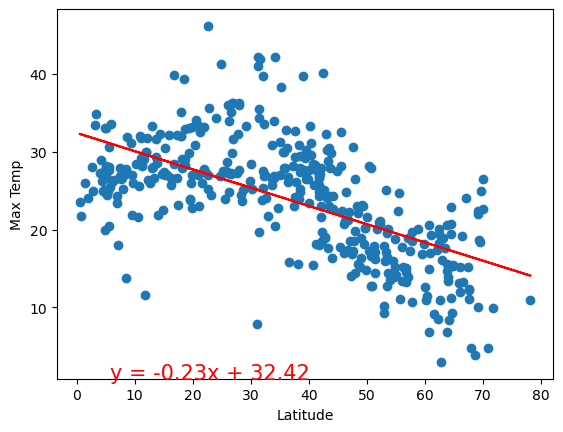

In [60]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7117269968854708


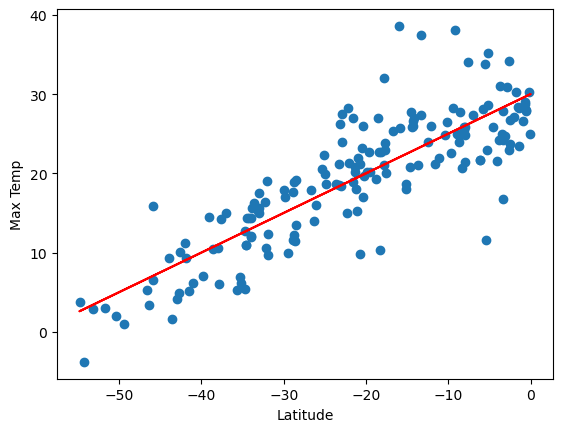

In [61]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Analysis : There is a strong negative corelation between the temp & Latitude as you move closer to the Nothern Hemisphere with few outliers
           #There is a strong positive corelation between the temp & Latitude as you move closer to the Southern Hemisphere with few outliers  

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.002455725783816539


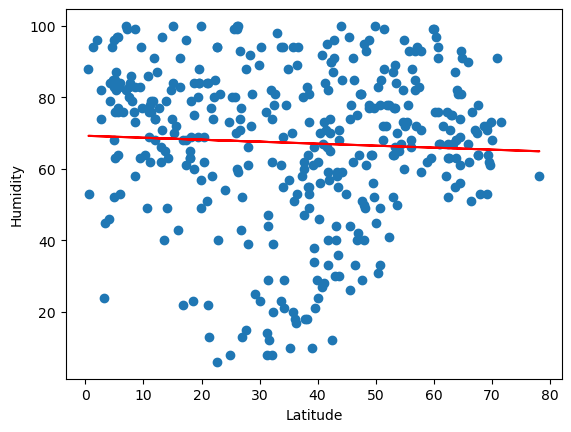

In [62]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.004096448705419679


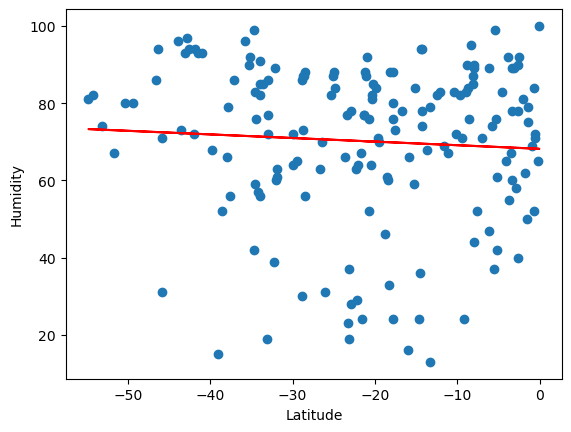

In [63]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Analysis : Since the regression line is almost horizontal for both Northern & Southern hemisphere, 
           #there seems to be no corelation between the humidity and the latitude in both parts

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.011704549935665942


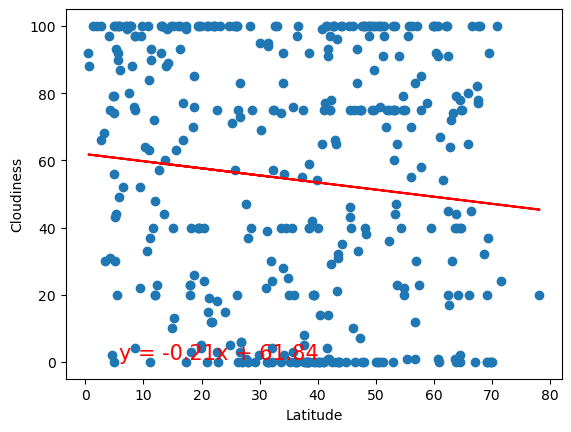

In [64]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.0036153634768365684


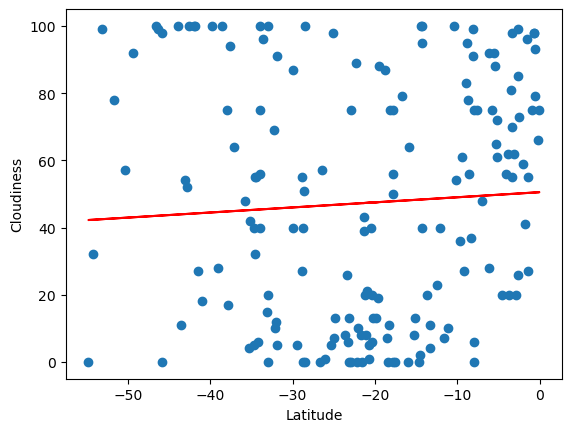

In [65]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
#Analysis : There is a slight negative corelation between the cloudiness & Latitude in the Nothern Hemisphere
           #There seems to be no corelation between the cloudiness & Latitude in the the Southern Hemisphere  

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003713670166393273


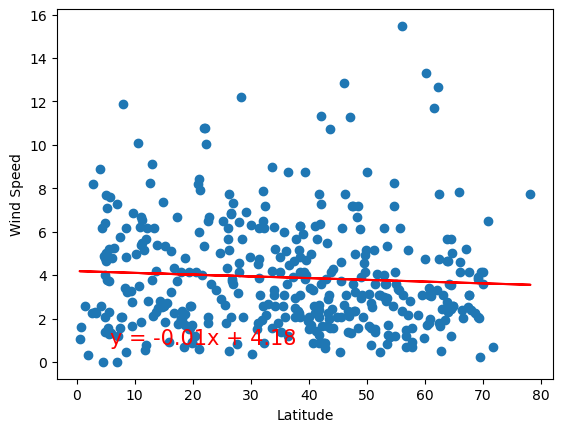

In [66]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.004712936282800717


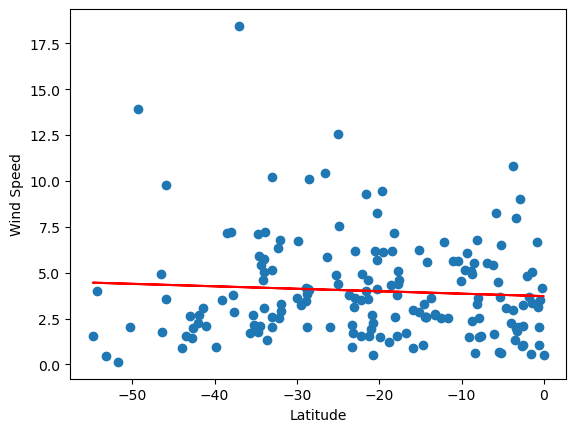

In [67]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Analysis : There is a weak relationship between the wind speed & latitude for the Northern hemisphere
           #There is a weaker relationship between the wind speed & latitude for the Southern hemisphere with a few outliers
          